In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np


data = pd.read_csv("../scratch/causal-inference-in-python-code/causal-inference-in-python/data/cross_sell_email.csv")
data

,gender,cross_sell_email,age,conversion
0,0,short,15,0
1,1,short,27,0
2,1,long,17,0
3,1,long,34,0
4,1,no_email,14,0
...,...,...,...,...
318,0,long,18,0
319,1,no_email,16,0
320,0,no_email,15,0
321,1,no_email,16,0


In [ ]:
sns.set_theme('notebook')
sns.set_palette(palette = 'pastel')

In [11]:
data2 = data.copy()
(data2.groupby(["cross_sell_email"]).mean())
# data2

,gender,age,conversion
cross_sell_email,,,
long,0.550459,21.752294,0.055046
no_email,0.542553,20.489362,0.042553
short,0.633333,20.991667,0.125000


In [3]:
X = ['gender', 'age']
mu = data.groupby("cross_sell_email")[X].mean()
var = data.groupby("cross_sell_email")[X].var()

norm_diff = ((mu - mu.loc["no_email"]) / np.sqrt((var + var.loc["no_email"]) / 2))
norm_diff

,gender,age
cross_sell_email,,
long,0.015802,0.221423
no_email,0.000000,0.000000
short,0.184341,0.087370


In [4]:
df = pd.read_csv(
    "../scratch/causal-inference-in-python-code/causal-inference-in-python/data/enem_scores.csv"
)
df.sort_values(by="avg_score", ascending=False).head(10)

,year,school_id,number_of_students,avg_score
16670,2007,33062633,68,82.97
16796,2007,33065403,172,82.04
16668,2005,33062633,59,81.89
16794,2005,33065403,177,81.66
10043,2007,29342880,43,80.32
18121,2007,33152314,14,79.82
16781,2007,33065250,80,79.67
3026,2007,22025740,144,79.52
14636,2007,31311723,222,79.41
17318,2007,33087679,210,79.38


In [5]:
data = pd.read_csv(
    "../scratch/causal-inference-in-python-code/causal-inference-in-python/data/cross_sell_email.csv"
)

short_email = data.query("cross_sell_email=='short'")["conversion"]
long_email = data.query("cross_sell_email=='long'")["conversion"]
email = data.query("cross_sell_email!='no_email'")["conversion"]
no_email = data.query("cross_sell_email=='no_email'")["conversion"]

data.groupby("cross_sell_email").size()


cross_sell_email
long        109
no_email     94
short       120
dtype: int64

To get the estimate for the standard deviation, you can apply the following equation:

\begin{equation}
\hat{𝛔} = \sqrt{\frac{1}{N - 1}\Sigma_{i = 0}^{N}(x - \bar{x})^{2}}
\end{equation}

In [6]:
def se(y: pd.Series):
    return y.std() / np.sqrt(len(y))


print(f"SE for Long Email: {se(long_email):.3g}")
print(f"SE for Short Email: {se(short_email):.3g}")

SE for Long Email: 0.0219
SE for Short Email: 0.0303


In [7]:
print(f"SE for Long Email: {long_email.sem():3g}")
print(f"SE for Short Email: {short_email.sem():3g}")

SE for Long Email: 0.021946
SE for Short Email: 0.030317


#### Confidence Intervals:
The standard error of the estimate is a measure of confidence. For the frequentist view of statistics, we would say that our data is nothing more than a manifestation of an underlying data-generating process. This process is abstract and ideal. It is governed by true paramters that are unchanged but also unknown to us. In the context of cross-sell email, if we ran multiple experiments  and calculated the conversion rate for each of them, they would fall around the true underlying conversion rate, even if they werent exactly equal to it. 
To better understand this, assume you have the true abstract distribution of conversion for the short cross-sell email. Because conversion is either zero or one, it follows a Bernoulli distribution and lets say that the probability of success in this distribution is 0.08. That is, whenever a customer receives the short email, it has an 8% chance of converting. Next, 10,000 experiments are ran. On each one, a sample of 100 customers is collected, and a short email is sent to abserve the average conversion, yielding a total of 10,000 conversion rates. The 10,000 conversion rates from those experiments will be distributed around th true mean of 0.08.

In [9]:
n = 100  # 100 customers
conv_rate = 0.08 # tru conversion rate

def run_experiment():
    return np.random.binomial(1, conv_rate, size = n)

np.random.seed(42)

experiments = [run_experiment().mean() for _ in range(10_000)]



In [13]:

import matplotlib as mpl

In [ ]:
mpl.use('MacOSX')

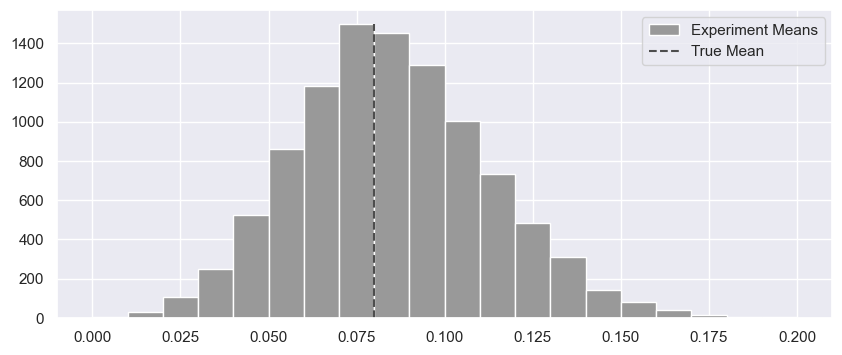

In [28]:
%matplotlib inline
plt.figure(figsize = (10, 4))
# freq, bins, img = sns.histplot(experiments, bins = 20, legend = True)
freq, bins, img = plt.hist(experiments, bins = 20, label = "Experiment Means", color = "0.6")
plt.vlines(conv_rate, ymin = 0, ymax = freq.max(), linestyles = "dashed", label = "True Mean", color = "0.3")
plt.legend()
plt.show()